# Random numbers

- [Introduction](#intro)
- [Python random numbers](#rn)
- [Gaussian distribution](#normal)
    - [Auto-correlation function](#ac_normal)
- [Binomial distribution](#binomial)
    - [Auto-correlation function](#ac_binomial)
- [Poisson distribution](#poisson)
- [Extra](#extra)

<div id="intro" />

## Introduction

We will demonstrate how to generate random numbers from the Gaussian, binomial, and Poisson distributions using Python. Also, we will examine the distribution of the generated random numbers, using the "histogram" function, and compare them with the exact results.

<div id="rn" />

## Python random numbers function (numpy.random)

- `seed(seed)` Initialize the generator with an integer "seed".
- `rand(d0,d1,...,dn)` Return a multi-dimensional array of uniform random numbers of shape (d0, d1, ... , dn).
- `randn(d0,d1,...,dn)` The same as above but from the standard normal distribution.
- `binomial(M,p,size)` Draw samples from a binomial distribution with "M" and "p".
- `poisson(a,size)` Draw samples from a Poisson distribution with "a".
- `choice([-1,1],size)` Generates random samples from the two choices, -1 or 1 in this case.
- `normal(ave,std,size)` Draw random samples from a normal distribution.
- `uniform([low,high,size])` Draw samples from a uniform distribution.

Gaussian and uniform random numbers can be generated also by "normal" and "uniform" functions, but we will use the "randn" and "rand" functions instead.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

<div id="normal" />

## Normal/Gaussian distribution

Let us first generate random numbers from a Gaussian distribution

\begin{equation}
P(x)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{(x-\langle X \rangle)^2}{2\sigma^2}\right]\tag{D1}
\end{equation}

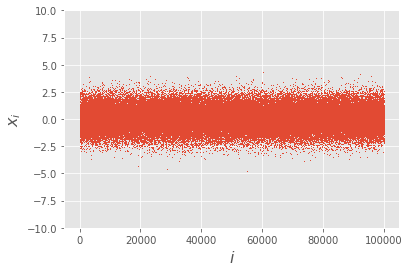

In [2]:
ave = 0.0
std = 1.0
N = 100000
np.random.seed(0)
X = ave + std*np.random.randn(N)

plt.ylim(-10, 10) 
plt.xlabel(r"$i$", fontsize=16)
plt.ylabel(r"$x_i$", fontsize=16)
plt.plot(X,",") # plot x_i vs. i (i=1,2,...,N) with dots
plt.show()

In the code example shown here, we set the average and the standard deviation to be zero and one, respectively. With this choice, the distribution is called the standard normal distribution. Here we generate one hundred thousand random numbers using an initial seed 0.

If you run the code example, you will see the "N" red points distributed around zero, mostly between -2 and +2.

Let's comapre now the simulation vs theoretical results

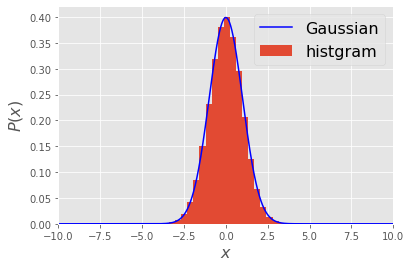

In [3]:
plt.hist(X, bins=25, density=True) # plot normalized histgram of R using 25 bins

x = np.arange(-10, 10, 0.01)
y = np.exp(-(x-ave)**2/(2*std**2))/np.sqrt(2*np.pi*std**2)

plt.xlim(-10, 10)
plt.plot(x, y, color='b')
plt.xlabel(r'$x$', fontsize=16)
plt.ylabel(r'$P(x)$',fontsize=16)
plt.legend([r'Gaussian', r'histgram'], fontsize=16)
plt.show()

<div id="ac_normal" />

### Auto-correlation function $\varphi(i)$

\begin{equation}
\varphi(i)=\frac{1}{N}\sum_{j=1}^{N} \left(x_j - \langle X\rangle\right)\left(x_{i+j}-\langle X\rangle\right) \tag{D2}
\end{equation}

\begin{equation}
\varphi(i=0)=\frac{1}{N}\sum_{j=1}^{N} \left(x_j - \langle X\rangle\right)^2=\langle x_j - \langle X\rangle\rangle^2=\sigma^2\tag{D3}
\end{equation}

\begin{equation}
\varphi(i\ne 0)= \langle x_j - \langle X\rangle\rangle\langle x_{i\ne j} - \langle X\rangle\rangle=0\hspace{5mm}
(\rightarrow{\rm White\ noise})\hspace{-12mm}
\tag{D4}
\end{equation}

sigma^2  = 1.0


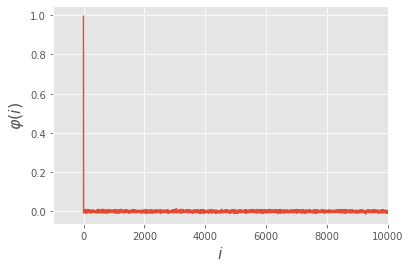

In [4]:
def auto_correlate(x):
    cor = np.correlate(x, x, mode="full")
    return cor[N-1:]

c = np.zeros(N)
c = auto_correlate(X-ave)/N

plt.plot(c)
plt.xlim(-1000, 10000)
plt.xlabel(r"$i$", fontsize=16)
plt.ylabel(r"$\varphi(i)$", fontsize=16)
print("sigma^2  =", std**2)
plt.show()

Next, we calculate the auto-correlation function defined in Eq.(D2) for the sequence random numbers we have generated.

The correlation function gives a measure of how "related" two variables are. In this case, we are interested in the correlation between the random numbers. In other words, if I know what number just came out of the generator, what can I say about the next number that will come out? If the correlation is zero, as given in Eq.(D4), then knowing one random number, tells me absolutely nothing about the next random number that can come out. This is expected from any good random number generator.

We will use the correlation function to confirm two basic properties of a random sequence.

- The 1st confirmation is on its variance, which should be equal to the square of the standard deviation, as shown in Eq.(D3).
- The 2nd confirmation is on the independency of the random numbers, as given by Eq.(D3).

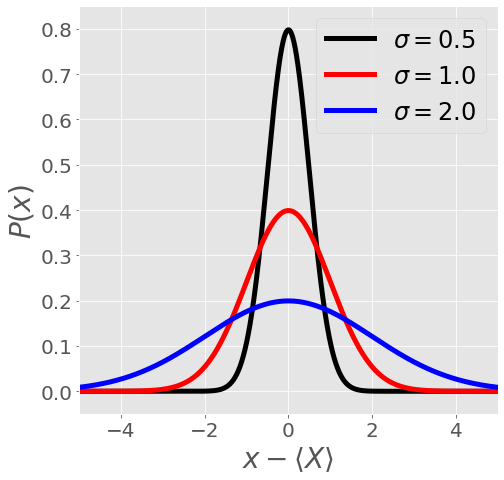

In [5]:
# Plots Gaussian distribution with different variance

fig, ax = plt.subplots(figsize=(7.5,7.5))
plt.xlim(-5, 5)
plt.ylim(-0.05, 0.85)
x = np.arange(-5, 5, 0.01)         
###
std = 0.5                           
ave = 0.0                         
y = np.exp(-(x-ave)**2/2/std**2)/np.sqrt(2*np.pi*std**2)
plt.plot(x, y, lw=5, color="k")     
###
std = 1.0                           
ave = 0.0                         
y = np.exp(-(x-ave)**2/2/std**2)/np.sqrt(2*np.pi*std**2) 
plt.plot(x, y, lw=5, color="r")     
###
std = 2.0                         
ave = 0.0                      
y = np.exp(-(x-ave)**2/2/std**2)/np.sqrt(2*np.pi*std**2) 
plt.plot(x, y, lw=5, color="b")    
###
plt.xlabel(r"$x-\langle X \rangle$", fontsize=28)
plt.ylabel(r"$P(x)$", fontsize=28)
plt.legend([r"$\sigma=0.5$", r"$\sigma=1.0$", r"$\sigma=2.0$"], fontsize=24)
plt.tick_params(labelsize=20)
plt.show()    

<div id="binomial" />

## Binomial distribution

\begin{equation}
P(n)=\frac{M!}{n!(M-n)!}p^{n}(1-p)^{M-n}\tag{D5}
\end{equation}

\begin{equation}
\langle n \rangle=Mp\tag{D6}
\end{equation}

\begin{equation}
\sigma^2=Mp(1-p)\tag{D7}
\end{equation}

Now, let us perform the same experiment, but this time drawing the random numbers from a binomial distribution.

As we have seen, this describes the distribution of the results for an experiment with two possible outcomes. The typical example is that of a coin toss. On every toss, we can obtain heads with probability p, and tails with probability (1-p). If the coin is fair, then we of course expect p = 1-p = 0.5. 

Here, we are interested in looking at the number of head or success results after one hundred coin tosses. To obtain reliable statistics, we perform this experiment one hundred thousand times, and each time we count the number of times head appears.

As you can see, all the results are scattered around an average of 50, and are almost all contained within the range between 30 and 70.

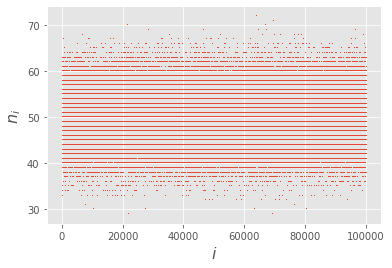

In [6]:
p = 0.5
M = 100 # set M, number of tosses in one experiment
N = 100000 # number of experiments
np.random.seed(0)

X = np.random.binomial(M, p, N) # generate the number of heads after M tosses, N times

plt.xlabel(r"$i$", fontsize=16)
plt.ylabel(r"$n_i$", fontsize=16)
plt.plot(X,",")
plt.show()

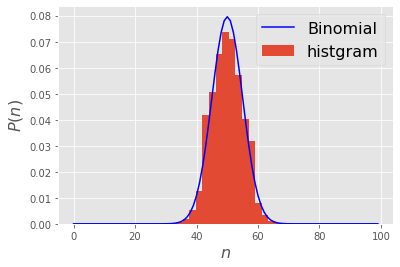

In [7]:
def binomial(n ,m, p):
    comb = math.factorial(m)/(math.factorial(n)*math.factorial(m-n))
    return comb*p**n*(1-p)**(m-n)

plt.hist(X, bins=20, density=True)

x = np.arange(M)
y = np.zeros(M)

for i in range(M):
    y[i] = binomial(i, M, p) # compute binomial distribution P(n), Eq. (D5)
    
plt.plot(x, y, color="b")
plt.xlabel(r"$n$", fontsize=16)
plt.ylabel(r"$P(n)$", fontsize=16)
plt.legend([r"Binomial", r"histgram"], fontsize=16)
plt.show()

<div id="ac_binomial" />

### Auto-correlation function $\varphi(i)$

\begin{equation}
\varphi(i)=\frac{1}{N}\sum_{j=1}^{N} \left(n_j - \langle n\rangle\right)\left(n_{i+j}-\langle n\rangle\right) \tag{D8}
\end{equation}

\begin{equation}
\varphi(i=0)=\frac{1}{N}\sum_{j=1}^{N} \left(n_j - \langle n\rangle\right)^2=\langle n_j - \langle n\rangle\rangle^2=\sigma^2=Mp(1-p)\tag{D9}
\end{equation}

\begin{equation}
\varphi(i\ne 0)= \langle n_j - \langle n\rangle\rangle\langle n_{i\ne j} - \langle n\rangle\rangle=0\hspace{8mm}
(\rightarrow{\rm White\ noise})\hspace{10mm}
\tag{D10}
\end{equation}

sigma^2  = 25.0


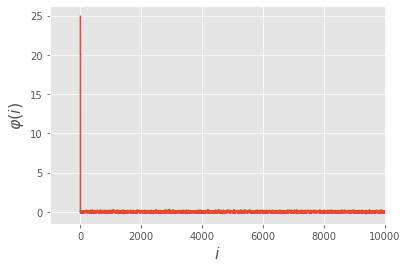

In [8]:
c = np.zeros(N)
c = auto_correlate(X-M*p)/N

plt.plot(c)
plt.xlim(-1000, 10000)
plt.xlabel(r"$i$", fontsize=16)
plt.ylabel(r"$\varphi(i)$", fontsize=16)
print("sigma^2  =", M*p*(1-p))
plt.show()

We use the same auto_correlate function as before.

To compare with the theory, we compute the exact value for i=0, which is given by Eq. (D9), and should be equal to $\sigma^2$. In this case $\sigma^2 = 25$. In addition, we see that there is no correlation between different random numbers.

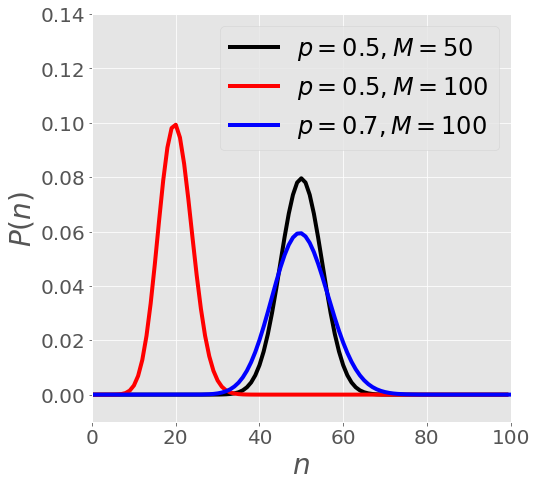

In [9]:
# Plot Binomial distribution
# We can set different values of p and M

fig, ax = plt.subplots(figsize=(7.5,7.5))
plt.xlim(0, 100)
plt.ylim(-0.01, 0.14)
#plt.ylim(0, 100)
p = 0.5   
M = 100                                         
x = np.arange(M)                               
y = np.zeros(M)  
for i in range(M):
    y[i] = binomial(i, M, p)     
plt.plot(x, y, lw=4, color="k")  
###
p = 0.2                                          
M = 100                                        
x = np.arange(M)                                
y = np.zeros(M)   
for i in range(M):
    y[i] = binomial(i,M,p)   
plt.plot(x, y, lw=4, color="r") 
###
p = 0.1                                      
M = 500                                        
x = np.arange(M)                               
y = np.zeros(M) 
for i in range(M):
    y[i] = binomial(i,M,p)                       
plt.plot(x, y, lw = 4, color = "b")                
#ax = plt.axes()
#plt.title(r"Binomial Distribution: p=%f, M=%i" % (p,M))
plt.xlabel(r"$n$", fontsize=28)
plt.ylabel(r"$P(n)$", fontsize=28)
ax.legend([r"$p=0.5, M=50$", r"$p=0.5, M=100$", r"$p=0.7, M=100$"], fontsize=24)
plt.tick_params(labelsize=20)
plt.show()    

<div id="poisson" />

## Poisson distribution

\begin{equation}
P(n)=\frac{a^n e^{-a}}{n!}\tag{D11}
\end{equation}

\begin{equation}
\langle n \rangle=a\tag{D12}
\end{equation}

\begin{equation}
\sigma^2=a\tag{D13}
\end{equation}

Finally, let us perform the experiment using the Poisson distribution. This can be used to describe the probability of n "events" occurring within some time interval, assuming the expected value is $a$. 

The typical example would be the number of requests received by a website within a one hour time period.

As you can see, all the results are scattered around an average of 10, and fall within the interval between 0 and 20.

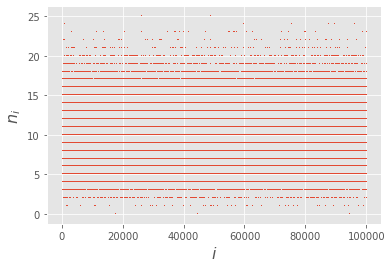

In [10]:
a = 10.0 # set a, the expected value
N = 100000 #  number of generated random numbers
np.random.seed(0)

X = np.random.poisson(a, N)
plt.xlabel(r"$i$", fontsize=16)
plt.ylabel(r"$n_i$", fontsize=16)
plt.plot(X,",")
plt.show()

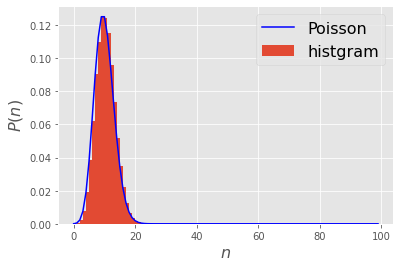

In [11]:
def poisson(n, a):
    return a**n*np.exp(-a)/math.factorial(n)

M = 100
plt.hist(X, bins=25, density=True)
x = np.arange(M)
y = np.zeros(M)

for i in range(M):
    y[i] = poisson(i, a) # Compute Poisson distribution for n, Eq. (D11)
    
plt.plot(x, y, color="b")
plt.xlabel(r"$n$", fontsize=16)
plt.ylabel(r"$P(n)$", fontsize=16)
plt.legend([r"Poisson", r"histgram"], fontsize=16)
plt.show()

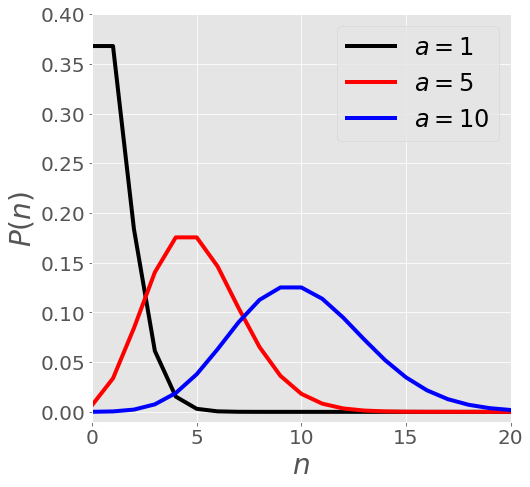

In [12]:
# Plot Poisson distribution
# We can set different values of a

fig, ax = plt.subplots(figsize=(7.5,7.5))
plt.xlim(0, 20)
plt.ylim(-0.01, 0.4)
M = 100                                         
x = np.arange(M)                                 
y = np.zeros(M)                              
###
a = 1                                    
for i in range(M):
    y[i] = poisson(i, a)                           
plt.plot(x, y, lw=4, color="k")               
###
a = 5                                   
for i in range(M):
    y[i] = poisson(i, a)                    
plt.plot(x, y, lw=4, color="r")               
###
a = 10                                        
for i in range(M):
    y[i] = poisson(i, a)                   
plt.plot(x, y, lw=4, color="b")                 
###
#ax = plt.axes()
#plt.title(r"Binomial Distribution: p=%f, M=%i" % (p, M))
plt.xlabel(r"$n$", fontsize=28)
plt.ylabel(r"$P(n)$", fontsize=28)
ax.legend([r"$a=1$", r"$a=5$", r"$a=10$"], fontsize=24)
plt.tick_params(labelsize=20)
plt.show()     

<div id="extra" />

## Extra

1. Consider the following random number generator, which generates a new "random" number $X_{i+1}$, from the previous number $X_{i}$, as
$$\begin{align}
X_{i+1} &= \textrm{mod}(a X_i + b, M),
\end{align}$$
with $\textrm{mod}$ the modulo operation, and $a$ and $M$ some constants (which should be very large numbers!).
This generator will give numbers within the range (0,M-1). To obtain random numbers within the unit interval $\zeta_i$, we set
$$\begin{align}
\zeta_i = X_i / M
\end{align}$$

    - Write a function which computes a random sequence using this generator.
    - Set $a=8121$, $b=28411$ and $M=134456$, and let the initial value (seed) be $X_0=123456$. 
    - Generate a sequence of $5\cdot10^5$ random numbers. 
    - Draw the histogram. Is the sequence uniform?
    - Compute the correlation function. Is this a good random number generator? Discuss your results.

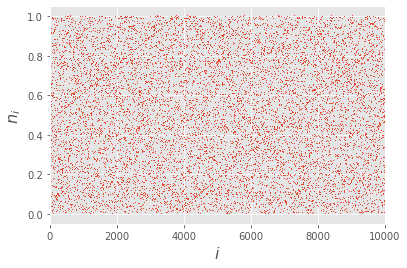

In [13]:
def rng(seed, a, b, M, ntotal):
    data = np.zeros(ntotal)
    for i in range(1, ntotal):
        data[i] = np.mod((a*data[i-1]+b), M)
    return data/np.float(M)
seed, a, b, m, N = 123456, 8121, 28411, 134456, 500000
X = rng(seed, a, b, m, N)

plt.xlabel(r"$i$", fontsize=16)
plt.ylabel(r"$n_i$", fontsize=16)
plt.plot(X,",")
plt.xlim(0, 10000)
plt.show()

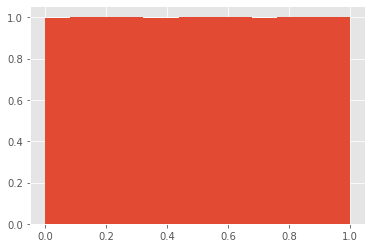

In [14]:
plt.hist(X, bins=25, density=True)
plt.show()

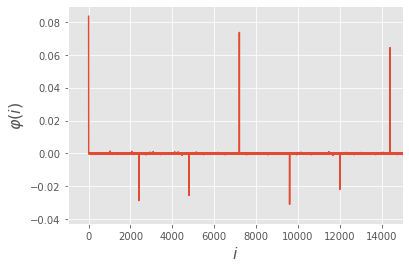

In [15]:
c = np.zeros(N)
c = auto_correlate(X-0.5)/N

plt.plot(c)
plt.xlim(-1000, 15000)
plt.xlabel(r"$i$", fontsize=16)
plt.ylabel(r"$\varphi(i)$", fontsize=16)
plt.show()